# 81_PCA eigenface -2

In [2]:
from sklearn.datasets import fetch_olivetti_faces
faces_all = fetch_olivetti_faces()

In [3]:
k = 20
faces = faces_all.images[faces_all.target == k]

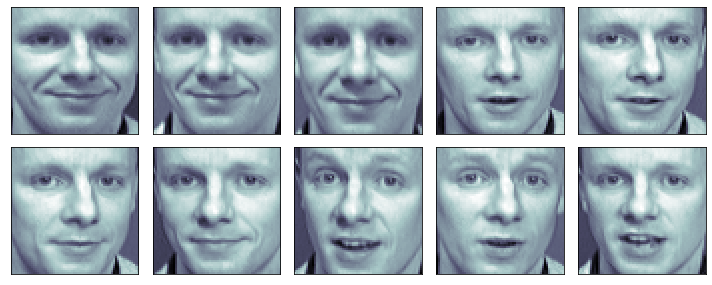

In [4]:
import matplotlib.pyplot as plt

N = 2       # 줄
M = 5       # 칸
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

In [7]:
## PCA 적용
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = faces_all.data[faces_all.target==k]
            # .data 를 사용해야 한다.

In [8]:
W = pca.fit_transform(X)

In [11]:
X_inv = pca.inverse_transform(W)
X_inv.shape

(10, 4096)

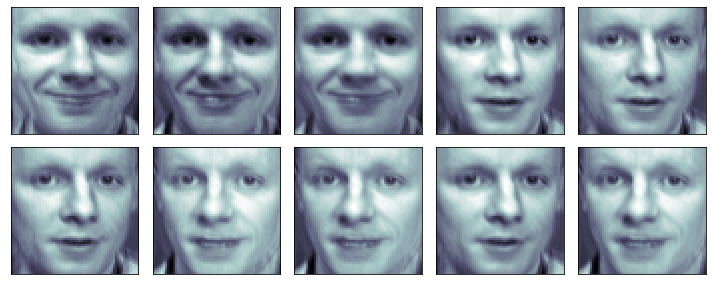

In [12]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64,64), cmap=plt.cm.bone)
                        # reshape(64 * 64) 를 해줘야 한다.
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()

-------------------------

In [13]:
face_mean = pca.mean_.reshape(64,64)

In [23]:
pca.components_.shape

(2, 4096)

In [19]:
face_p1 = pca.components_[0].reshape(64,64)
face_p2 = pca.components_[1].reshape(64,64)

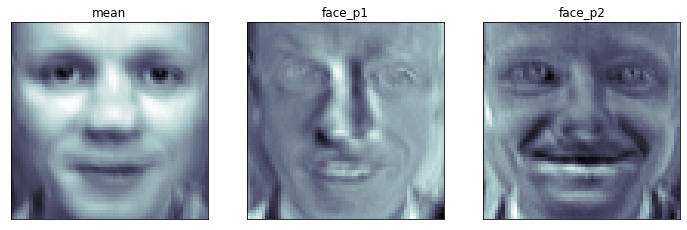

In [20]:
plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]); plt.title('mean')

plt.subplot(132)
plt.imshow(face_p1, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]); plt.title('face_p1')

plt.subplot(133)
plt.imshow(face_p2, cmap = plt.cm.bone)
plt.grid(False); plt.xticks([]);plt.yticks([]); plt.title('face_p2')

plt.show()

In [24]:
# 가중치 선정
import numpy as np

N = 2
M = 5
w = np.linspace(-5, 10, N*M)

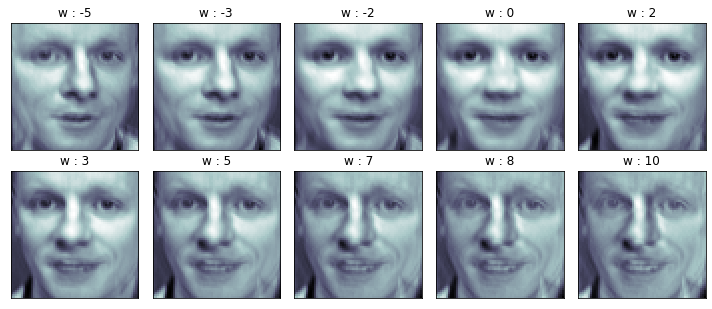

In [26]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('w : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

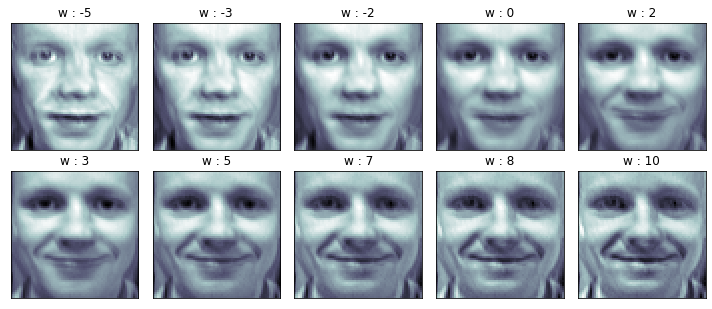

In [27]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n] * face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('w : ' + str(round(w[n])))

plt.tight_layout()
plt.show()

In [28]:
nx, ny = (5,5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

w1, w2 = np.meshgrid(x,y)

In [30]:
w1.shape

(5, 5)

In [32]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

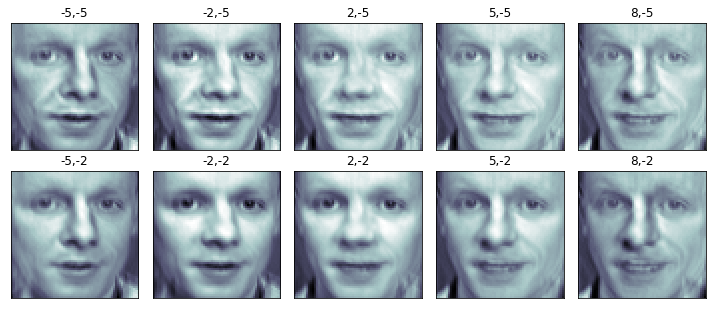

In [33]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)

for n in range(N * M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n] * face_p1 + w2[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title(str(round(w1[n])) + ',' + str(round(w2[n])))

plt.tight_layout()
plt.show()